In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
#data = pd.read_csv('time_series_19-covid-Confirmed.csv')
data= pd.read_csv('COVID19_open_line_list.csv')

In [3]:
data.drop(['Unnamed: '+str(x) for x in range(33,45)],axis=1,inplace=True) #deletes unnecessary columns
data.head()

,ID,age,sex,city,province,country,wuhan(0)_not_wuhan(1),latitude,longitude,geo_resolution,...,outcome,date_death_or_discharge,notes_for_discussion,location,admin3,admin2,admin1,country_new,admin_id,data_moderator_initials
0,1.0,30,male,"Chaohu City, Hefei City",Anhui,China,1.0,31.646960,117.716600,admin3,...,NaN,NaN,NaN,NaN,Chaohu City,Hefei City,Anhui,China,340181,NaN
1,2.0,47,male,"Baohe District, Hefei City",Anhui,China,1.0,31.778630,117.331900,admin3,...,NaN,NaN,NaN,NaN,Baohe District,Hefei City,Anhui,China,340111,NaN
2,3.0,49,male,"High-Tech Zone, Hefei City",Anhui,China,1.0,31.828313,117.224844,point,...,NaN,NaN,NaN,High-Tech Zone,Shushan District,Hefei City,Anhui,China,340104,NaN
3,4.0,47,female,"High-Tech Zone, Hefei City",Anhui,China,1.0,31.828313,117.224844,point,...,NaN,NaN,NaN,High-Tech Zone,Shushan District,Hefei City,Anhui,China,340104,NaN
4,5.0,50,female,"Feidong County, Hefei City",Anhui,China,1.0,32.001230,117.568100,admin3,...,NaN,NaN,NaN,NaN,Feidong County,Hefei City,Anhui,China,340122,NaN


<p>There are 14126 rows in the dataset.</p>

In [4]:
len(data)

14126

<p>Calling data.columns will print out the columns in the DataFrame.</p>

In [5]:
data.columns

Index(['ID', 'age', 'sex', 'city', 'province', 'country',
       'wuhan(0)_not_wuhan(1)', 'latitude', 'longitude', 'geo_resolution',
       'date_onset_symptoms', 'date_admission_hospital', 'date_confirmation',
       'symptoms', 'lives_in_Wuhan', 'travel_history_dates',
       'travel_history_location', 'reported_market_exposure',
       'additional_information', 'chronic_disease_binary', 'chronic_disease',
       'source', 'sequence_available', 'outcome', 'date_death_or_discharge',
       'notes_for_discussion', 'location', 'admin3', 'admin2', 'admin1',
       'country_new', 'admin_id', 'data_moderator_initials'],
      dtype='object')

<h3>Spread of the Coronavirus Across Countries<h3>

<p>Questions need to be answered:</p>

<ul><li>How many cases are there across countries?</li><li>How does the spread differ among continents?</li></ul>

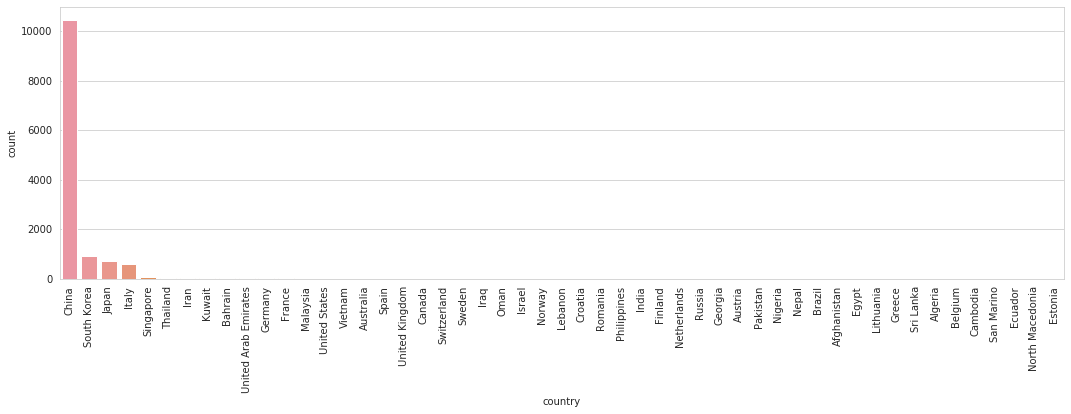

In [6]:
fig = plt.figure(figsize=(18,5))
sns.set_style('whitegrid')
sns.countplot(data['country'],order=data['country'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

In [35]:
plt.savefig('3Asia')

<Figure size 432x288 with 0 Axes>

<p>Three of Asia’s largest countries are the highest. <p>It seems that the vast majority of cases occurred in China.  China has at least 10 times more cases than South Korea and Italy combined.

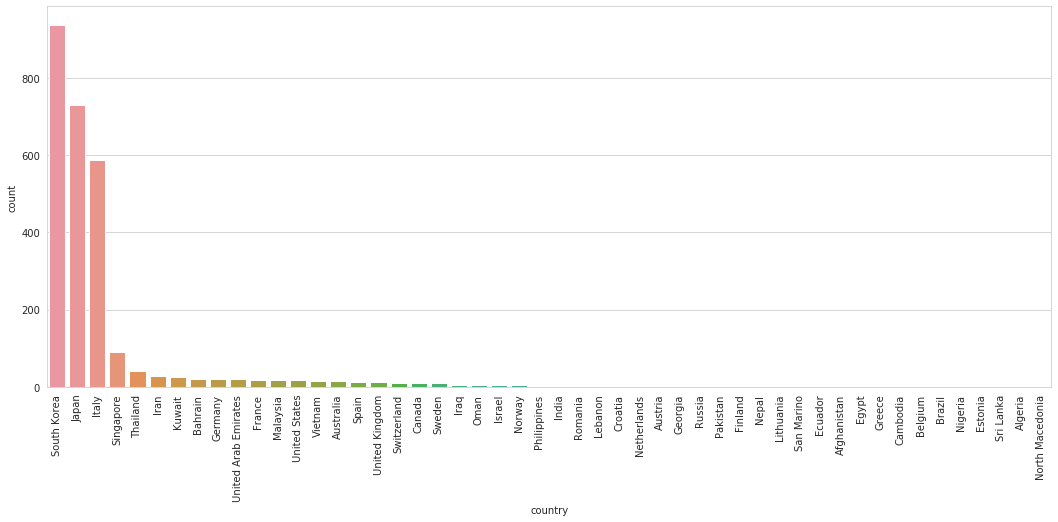

In [7]:
fig = plt.figure(figsize=(18,7))
sns.set_style('whitegrid')
sns.countplot(data[data['country'] != 'China']['country'],order=data[data['country'] != 'China']['country'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

<p>Let's plot out the percent of the population infected in South Korea, Japan, Italy, and the United States:</p>

Text(0.5, 0, 'country')

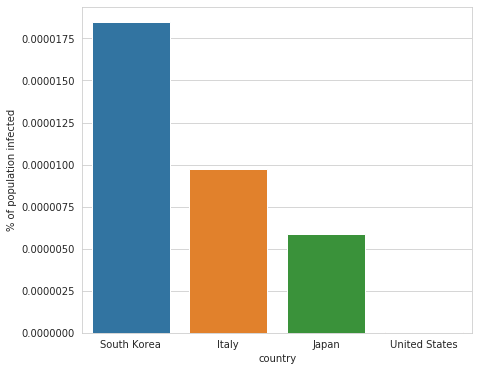

In [8]:
plt.figure(figsize=(7,6))
sns.barplot(x=['South Korea','Italy','Japan','United States'],
        
y=[938/50_800_000,588/60_430_000,731/124_800_000,17/327_170_000])
plt.ylabel("% of population infected")
plt.xlabel("country")

<p>The persent for US is not even visible</p>

<h3> Prediction of the Spread of Coronavirus</h3>

In [9]:
data2 = pd.read_csv('time_series_19-covid-Confirmed.csv')

In [10]:
data2


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20
0,NaN,Thailand,15.0000,101.0000,2,3,5,7,8,8,...,47,48,50,50,50,53,59,70,75,82
1,NaN,Japan,36.0000,138.0000,2,1,2,2,4,4,...,360,420,461,502,511,581,639,639,701,773
2,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,...,117,130,138,150,150,160,178,178,200,212
3,NaN,Nepal,28.1667,84.2500,0,0,0,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,NaN,Malaysia,2.5000,112.5000,0,0,0,3,4,4,...,50,83,93,99,117,129,149,149,197,238
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
437,NaN,Saint Lucia,13.9094,-60.9789,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
438,NaN,Saint Vincent and the Grenadines,12.9843,-61.2872,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
439,NaN,Suriname,3.9193,-56.0278,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
440,"Virgin Islands, U.S.",US,18.3358,-64.8963,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


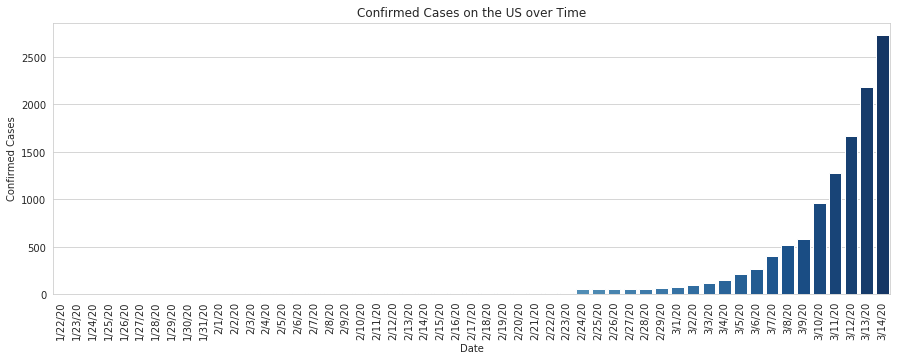

In [11]:


plot_data = data2[data2['Country/Region']=='US'].sum().drop(['Province/State','Country/Region','Lat','Long'])
plt.figure(figsize=(15,5))
sns.barplot(plot_data.index,plot_data,palette='Blues')
plt.xticks(rotation=90)
plt.xlabel("Date")
plt.ylabel("Confirmed Cases")
plt.title("Confirmed Cases on the US over Time")
plt.show()

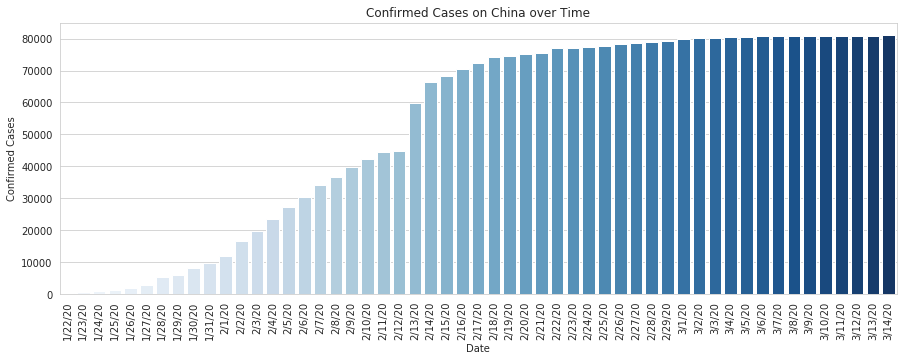

In [12]:
plot_data = data2[data2['Country/Region']=='China'].sum().drop(['Province/State','Country/Region','Lat','Long'])
plt.figure(figsize=(15,5))
sns.barplot(plot_data.index,plot_data,palette='Blues')
plt.xticks(rotation=90)
plt.xlabel("Date")
plt.ylabel("Confirmed Cases")
plt.title("Confirmed Cases on China over Time")
plt.show()

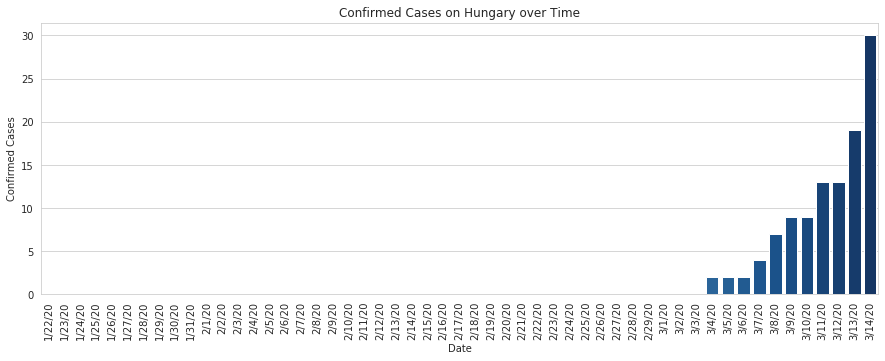

In [13]:
plot_data = data2[data2['Country/Region']=='Hungary'].sum().drop(['Province/State','Country/Region','Lat','Long'])
plt.figure(figsize=(15,5))
sns.barplot(plot_data.index,plot_data,palette='Blues')
plt.xticks(rotation=90)
plt.xlabel("Date")
plt.ylabel("Confirmed Cases")
plt.title("Confirmed Cases on Hungary over Time")
plt.show()

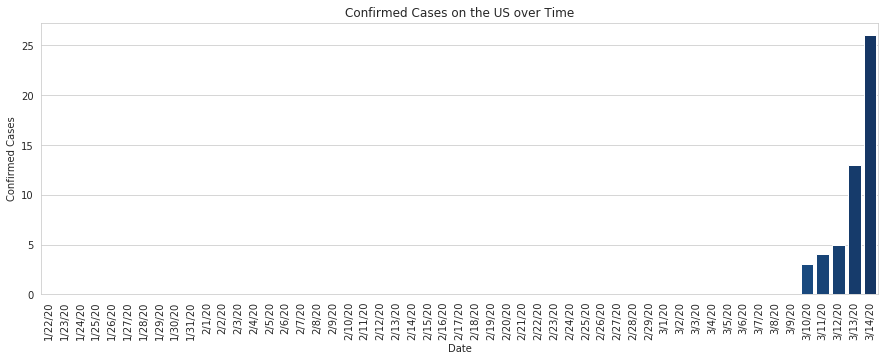

In [14]:
plot_data = data2[data2['Province/State']=='Ohio'].sum().drop(['Province/State','Country/Region','Lat','Long'])
plt.figure(figsize=(15,5))
sns.barplot(plot_data.index,plot_data,palette='Blues')
plt.xticks(rotation=90)
plt.xlabel("Date")
plt.ylabel("Confirmed Cases")
plt.title("Confirmed Cases on the US over Time")
plt.show()

<h3>Preprocessing</h3>

In [17]:
data4= pd.read_csv('covid_19_clean_complete.csv', 
                         parse_dates=['Date'])

In [18]:
cases=['Confirmed', 'Deaths', 'Recovered','Active']

In [19]:
data4['Active'] = data4['Confirmed'] - data4['Deaths'] - data4['Recovered']


In [20]:
#filling missing values
data4[['Province/State']] = data4[['Province/State']].fillna('')
data4[cases]=data4[cases].fillna(0)

In [21]:
data4

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active
0,,Thailand,15.0000,101.0000,2020-01-22,2,0,0,2
1,,Japan,36.0000,138.0000,2020-01-22,2,0,0,2
2,,Singapore,1.2833,103.8333,2020-01-22,0,0,0,0
3,,Nepal,28.1667,84.2500,2020-01-22,0,0,0,0
4,,Malaysia,2.5000,112.5000,2020-01-22,0,0,0,0
...,...,...,...,...,...,...,...,...,...
11955,,Aruba,12.5211,-69.9683,2020-03-13,2,0,0,2
11956,Grand Princess,Canada,37.6489,-122.6655,2020-03-13,2,0,0,2
11957,,Kenya,-0.0236,37.9062,2020-03-13,1,0,0,1
11958,,Antigua and Barbuda,17.0608,-61.7964,2020-03-13,1,0,0,1


In [22]:
china = data4[data4['Country/Region']=='China']
row = data4[data4['Country/Region']!='China']

In [23]:
full_latest = data4[data4['Date'] == max(data4['Date'])].reset_index()

In [24]:
china_latest = full_latest[full_latest['Country/Region']=='China']
row_latest = full_latest[full_latest['Country/Region']!='China']


In [25]:
full_latest_grouped = full_latest.groupby('Country/Region')[['Confirmed','Deaths', 'Recovered','Active']].sum().reset_index()

In [26]:
china_latest_grouped = china_latest.groupby('Province/State')[['Confirmed', 'Deaths', 'Recovered', 'Active']].sum().reset_index()
row_latest_grouped = row_latest.groupby('Country/Region')[['Confirmed', 'Deaths', 'Recovered', 'Active']].sum().reset_index()


<h3>Latest Data</h3>

In [27]:
temp = data4.groupby('Date')[['Confirmed', 'Deaths', 'Recovered', 'Active']].sum().reset_index()
temp = temp[temp['Date']==max(temp['Date'])].reset_index(drop=True)
temp.style.background_gradient(cmap='Pastel1')

,Date,Confirmed,Deaths,Recovered,Active
0,2020-03-13 00:00:00,145193,5404,70251,69538


In [1]:
#this table is hhuge, remove the # if you want to see, what is going on all around the world
#allCountry = full_latest_grouped.sort_values(by='Confirmed', ascending=False)
#allCountry= data4.reset_index(drop=True)
#allCountry.style.background_gradient(cmap='Reds')
